In [1]:
import pandas as pd
from hydrograph_lab.evaluation import align_obs_sim, evaluate_model
from hydrograph_lab.plotting_compare import plot_model_comparison

In [2]:
obs_path = "../obs.csv"
sim_path = "../sim.csv"

obs_df = pd.read_csv(obs_path)
sim_df = pd.read_csv(sim_path)

obs_df["datetime"] = pd.to_datetime(obs_df["datetime"])
sim_df["datetime"] = pd.to_datetime(sim_df["datetime"])

obs_df = obs_df.set_index("datetime")
sim_df = sim_df.set_index("datetime")

obs_df.head(), sim_df.head()

(                     Q_obs
 datetime                  
 2024-01-01 00:00:00   10.0
 2024-01-01 01:00:00   12.0
 2024-01-01 02:00:00   15.0
 2024-01-01 03:00:00   14.0
 2024-01-01 04:00:00   16.0,
                      Q_sim
 datetime                  
 2024-01-01 00:00:00   11.0
 2024-01-01 01:00:00   13.0
 2024-01-01 02:00:00   14.0
 2024-01-01 03:00:00   13.0
 2024-01-01 04:00:00   16.0)

In [3]:
obs_series, sim_series = align_obs_sim(obs_df, sim_df, obs_col="Q_obs", sim_col="Q_sim")
obs_series.head(), sim_series.head()

(datetime
 2024-01-01 00:00:00    10.0
 2024-01-01 01:00:00    12.0
 2024-01-01 02:00:00    15.0
 2024-01-01 03:00:00    14.0
 2024-01-01 04:00:00    16.0
 Name: obs, dtype: float64,
 datetime
 2024-01-01 00:00:00    11.0
 2024-01-01 01:00:00    13.0
 2024-01-01 02:00:00    14.0
 2024-01-01 03:00:00    13.0
 2024-01-01 04:00:00    16.0
 Name: sim, dtype: float64)

In [4]:
metrics = evaluate_model(obs_df, sim_df, obs_col="Q_obs", sim_col="Q_sim")
metrics

{'NSE': np.float64(0.9450630776379877),
 'KGE': 0.9150075835075445,
 'RMSE': 1.1770372409854613,
 'Bias': np.float64(1.47651006711409),
 'R': 0.974741026388154,
 'logNSE': np.float64(0.9102658599415313)}

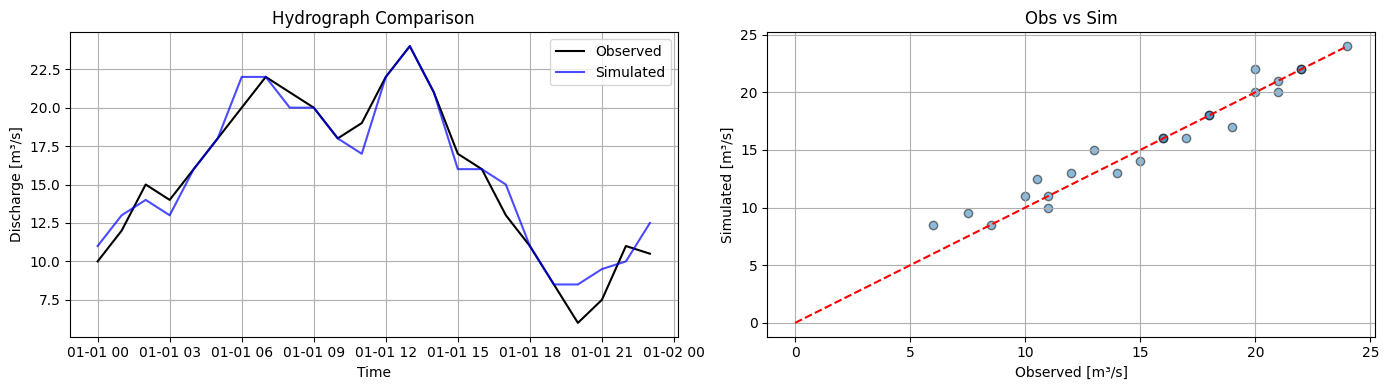

In [5]:
plot_model_comparison(obs_series, sim_series)